# Aula 3

In [38]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (20,8)
sns.set_style('darkgrid')

# Desafio : Desenvolver uma função roda o modelo automaticamente.

In [117]:
class Modelo_prophet_semanal:
    
    def __init__(self, dados:pd.DataFrame, teste_periodo=30, **kwargs_model):
        
        self.treino = dados[:len(dados) - teste_periodo]
        self.teste = dados[len(dados) - teste_periodo:]
        self.modelo = Prophet(daily_seasonality=False, yearly_seasonality=False, **kwargs_model)
        self.modelo.fit(self.treino)
        self.previsao = self.modelo.predict(self.modelo.make_future_dataframe(periods=teste_periodo))
    
    def plota(self, xlabel='', ylabel='', teste=True, changepoint=True, ax=None, show=False, month_freq=3, kwargs_modeloplot={}, kwargs_testeplot={}):
    
        if ax is None:
            fig = plt.figure(figsize=(20,10))
            ax = fig.add_subplot(111)
        
        plt.sca(ax)
        self.modelo.plot(self.previsao, xlabel=xlabel, ylabel=ylabel, ax=ax, **kwargs_modeloplot)
        plt.plot(self.teste['ds'], self.teste['y'], **kwargs_testeplot)
        
        if len(self.teste) > 0:
            plt.xticks(pd.date_range(min(self.treino['ds']), max(self.teste['ds']), freq=f'{month_freq}MS'),pd.date_range(min(self.treino['ds']), max(self.teste['ds']), freq=f'{month_freq}MS').strftime('%Y-%b'))
        else:
            plt.xticks(pd.date_range(min(self.treino['ds']), max(self.treino['ds']), freq=f'{month_freq}MS'),pd.date_range(min(self.treino['ds']), max(self.treino['ds']), freq=f'{month_freq}MS').strftime('%Y-%b'))
        
        if changepoint is True:
            change = add_changepoints_to_plot(ax, self.modelo, self.previsao)
    
        if show is True:
            plt.show()
            
        elif ax is None:
            return fig

# Desafio : Identificar potenciais changepoints.

In [102]:
dados_sp = pd.read_csv('dados/dados_covid_sp', parse_dates=['datahora'])
dados_sp.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,media_movel_obitos,ano,obitos_3dias_depois,obitos_5dias_depois,obitos_7dias_depois,obitos_10dias_depois,obitos_12dias_depois,obitos_14dias_depois,obitos_16dias_depois,obitos_21dias_depois
0,São Paulo,3550308,25,2,2020-02-25,1,0,"8,424841e-03","0,0000000",0,...,NaN,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,São Paulo,3550308,26,2,2020-02-26,1,0,"8,424841e-03","0,0000000",0,...,NaN,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,São Paulo,3550308,27,2,2020-02-27,1,0,"8,424841e-03","0,0000000",0,...,NaN,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,São Paulo,3550308,28,2,2020-02-28,2,1,"1,684968e-02","0,0000000",0,...,NaN,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
4,São Paulo,3550308,29,2,2020-02-29,2,0,"1,684968e-02","0,0000000",0,...,NaN,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
df = dados_sp[['datahora', 'casos_novos']]
df.columns = ['ds', 'y']

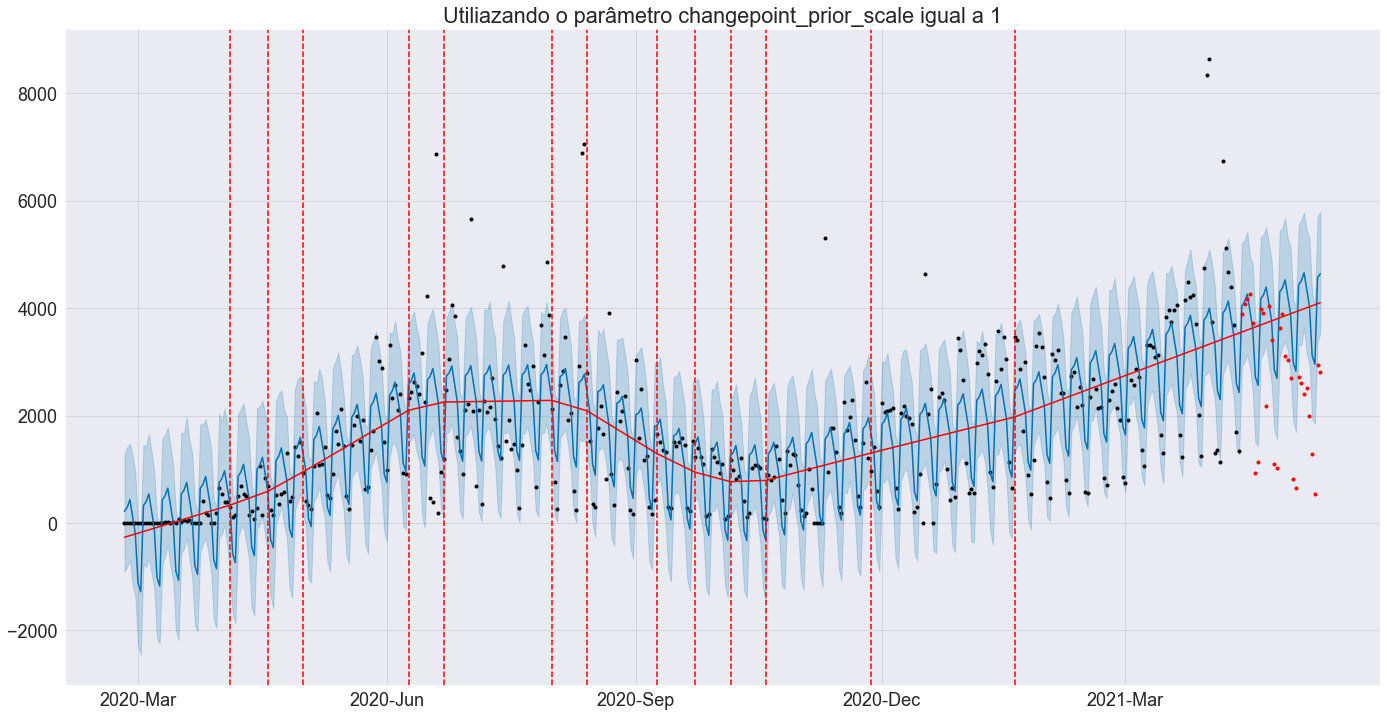

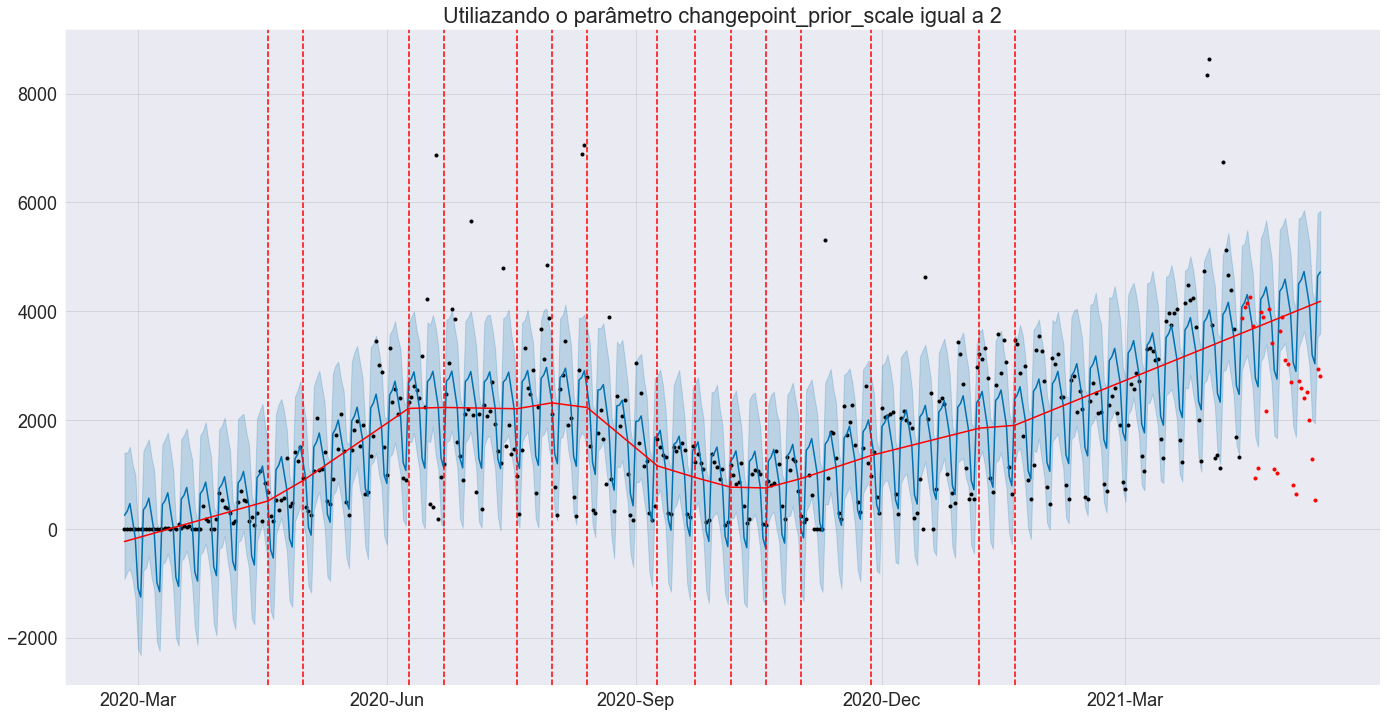

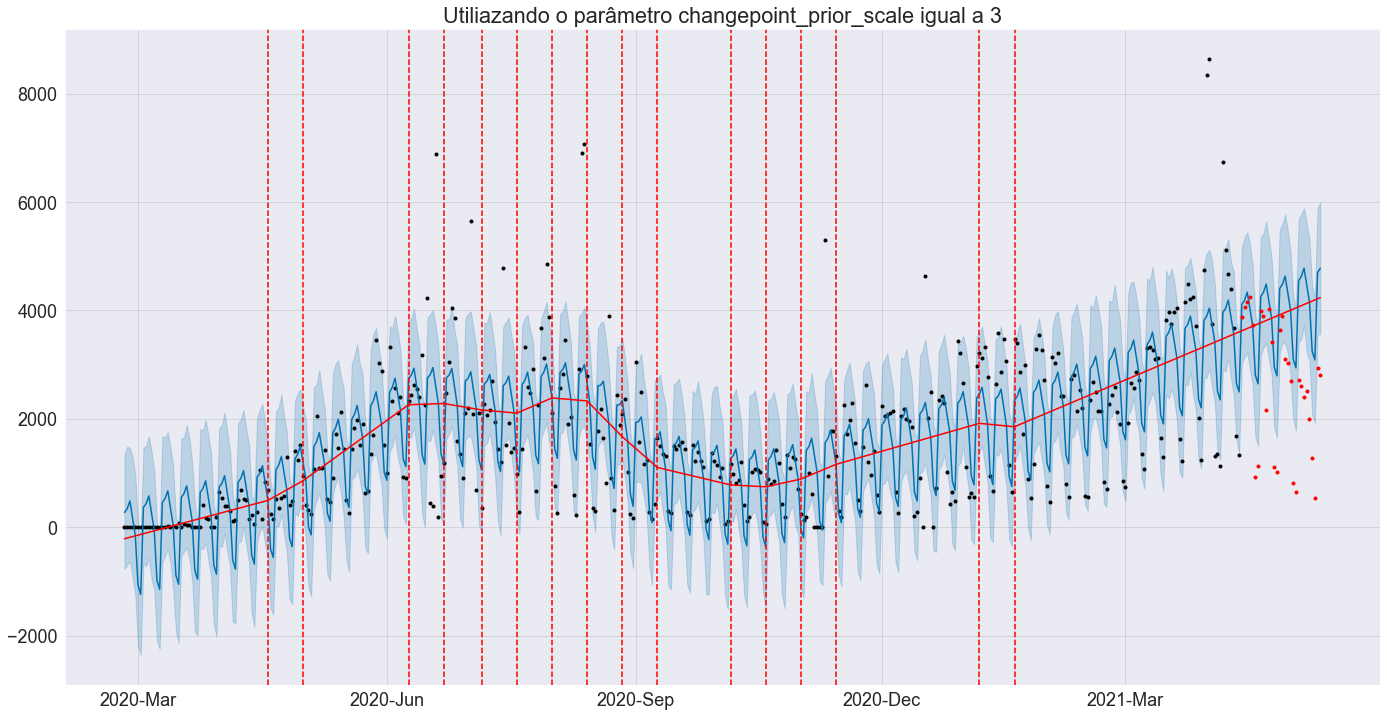

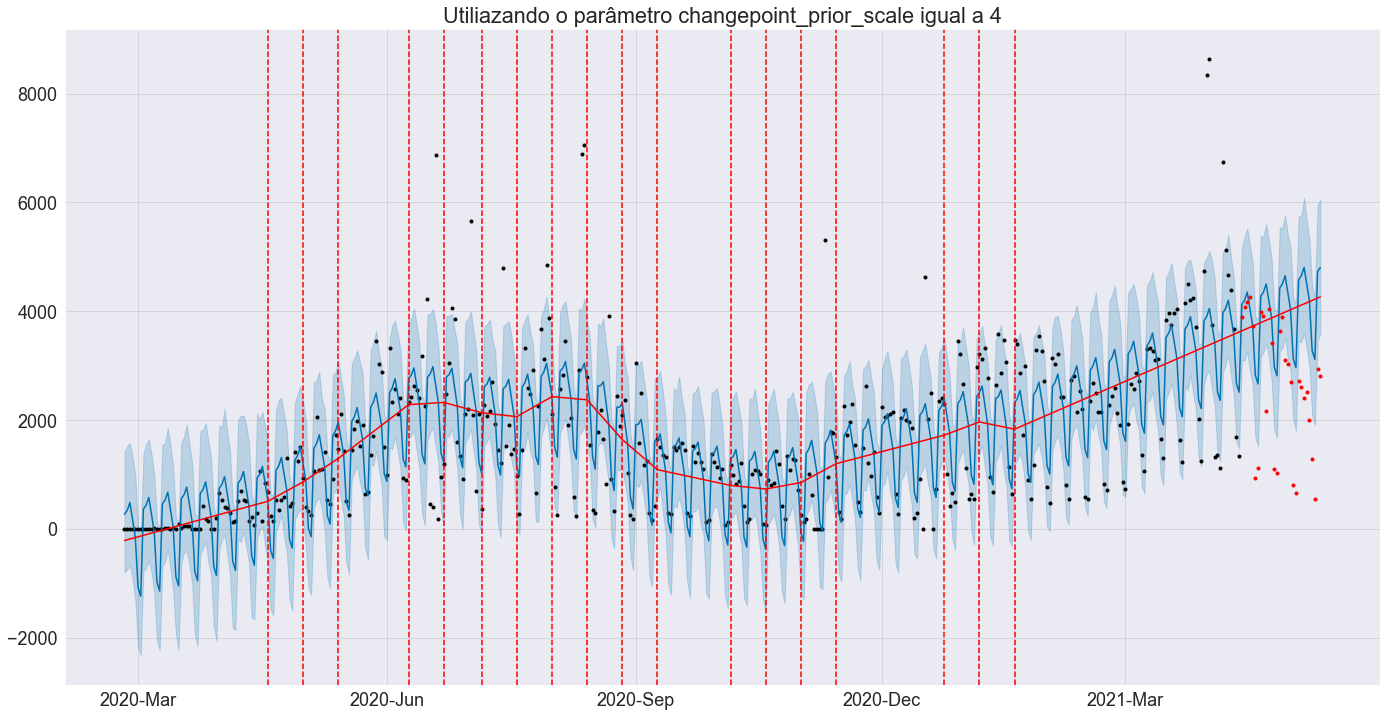

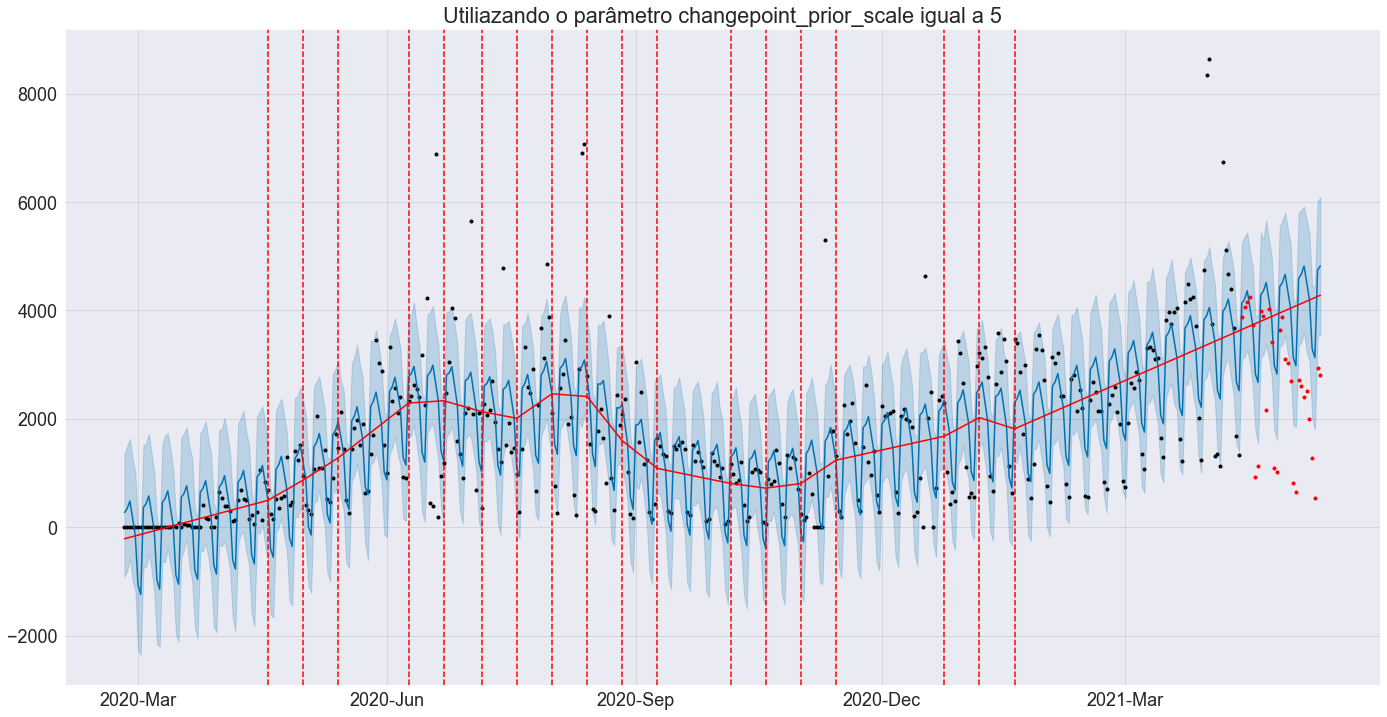

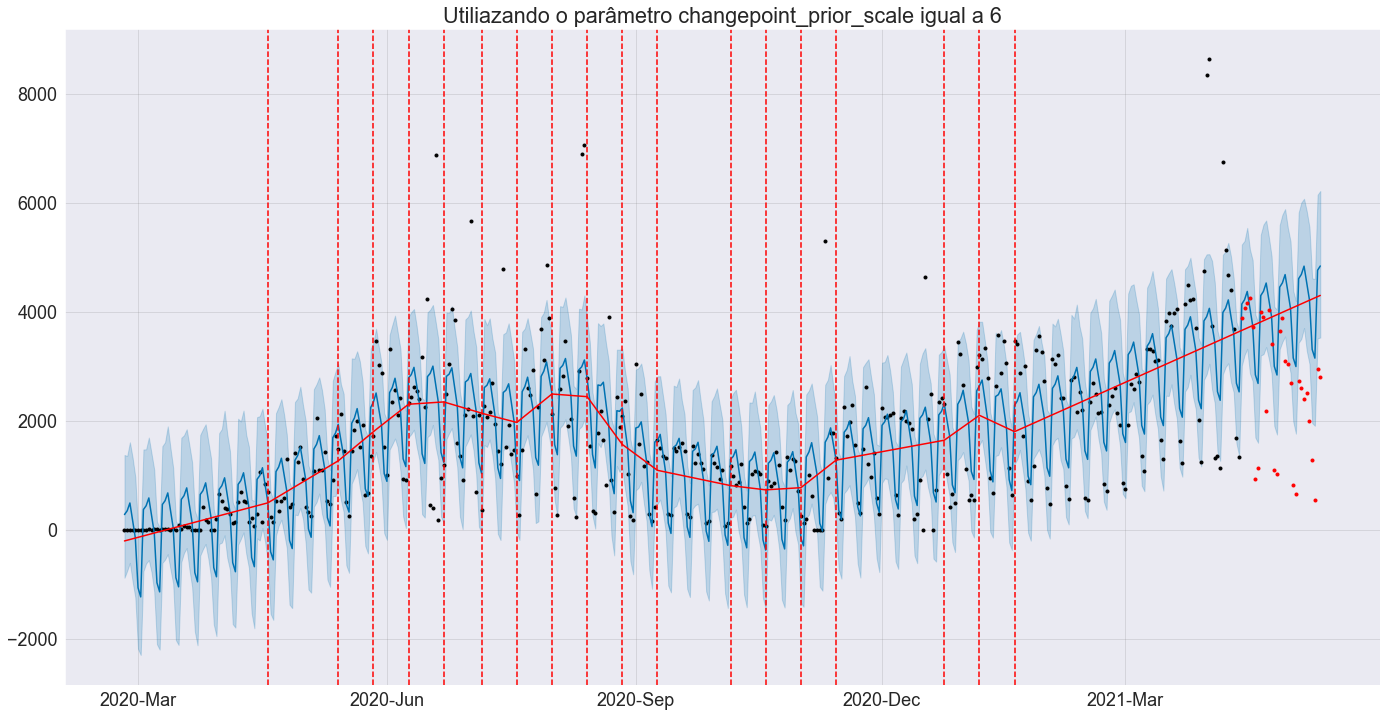

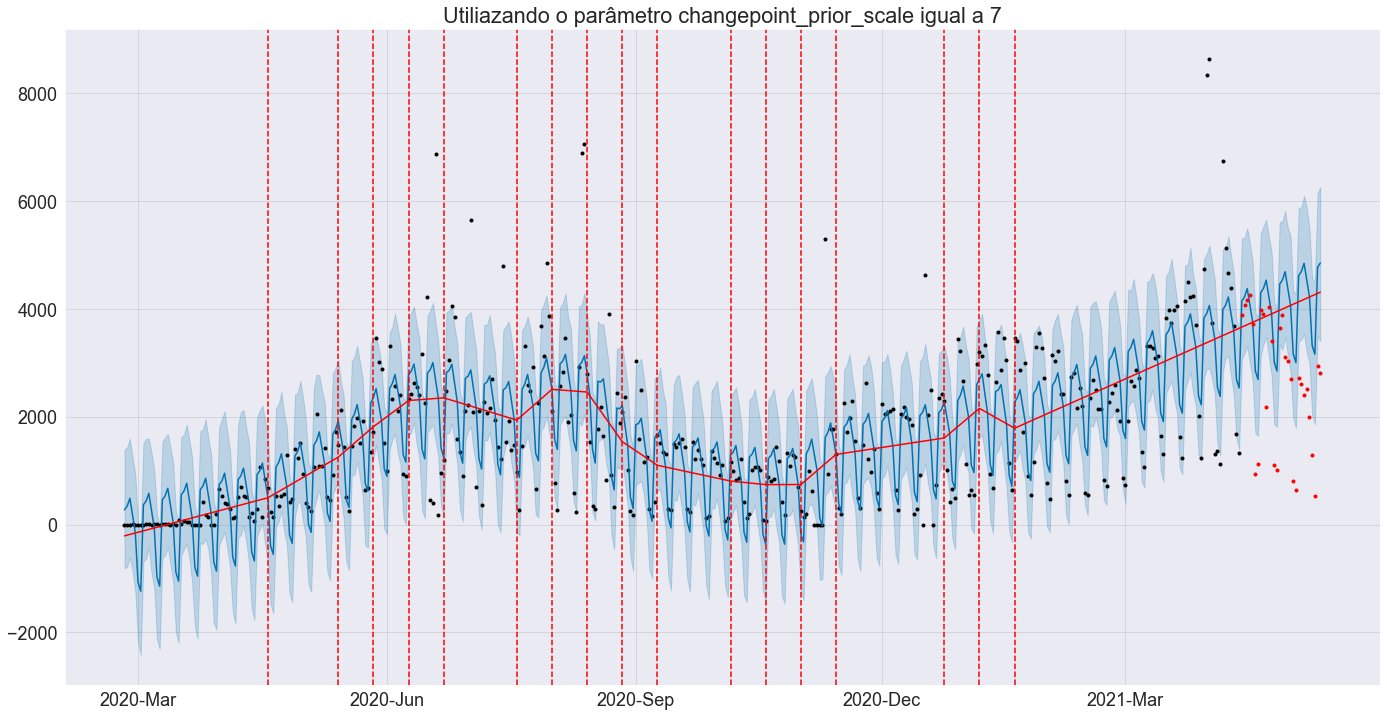

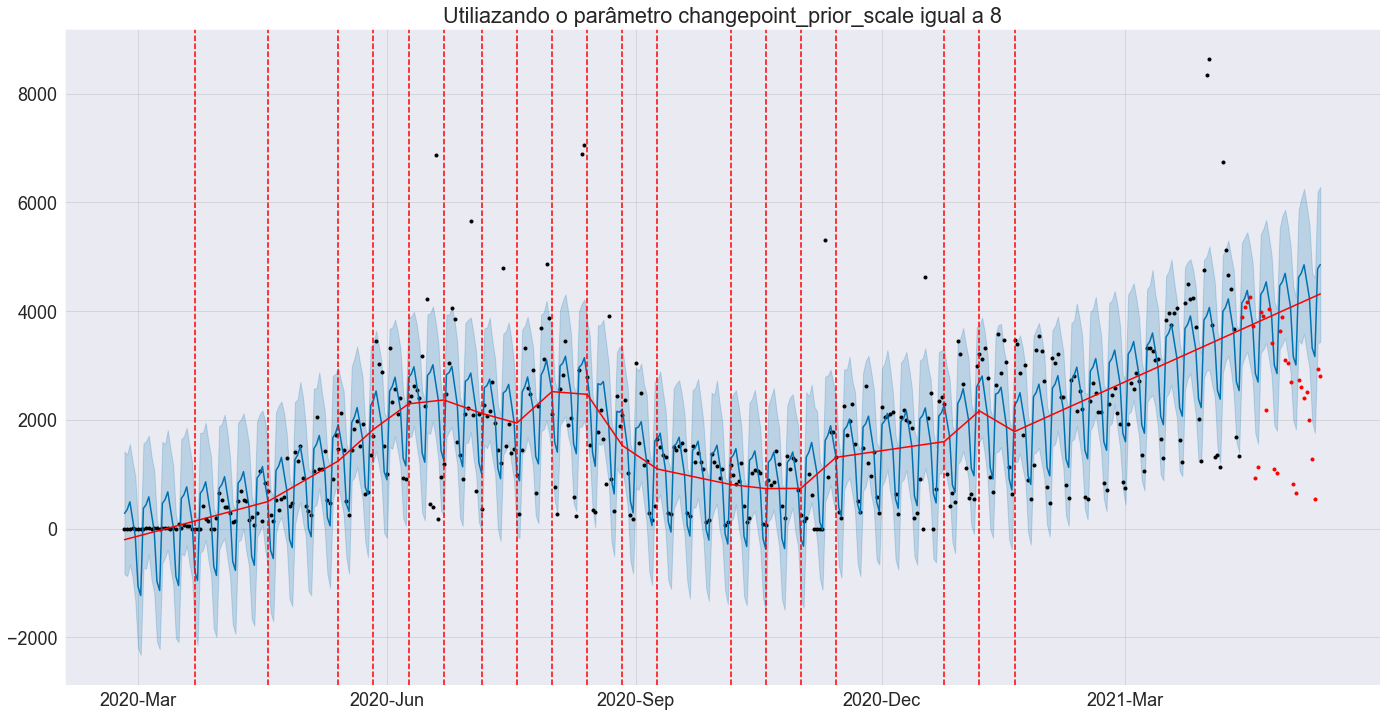

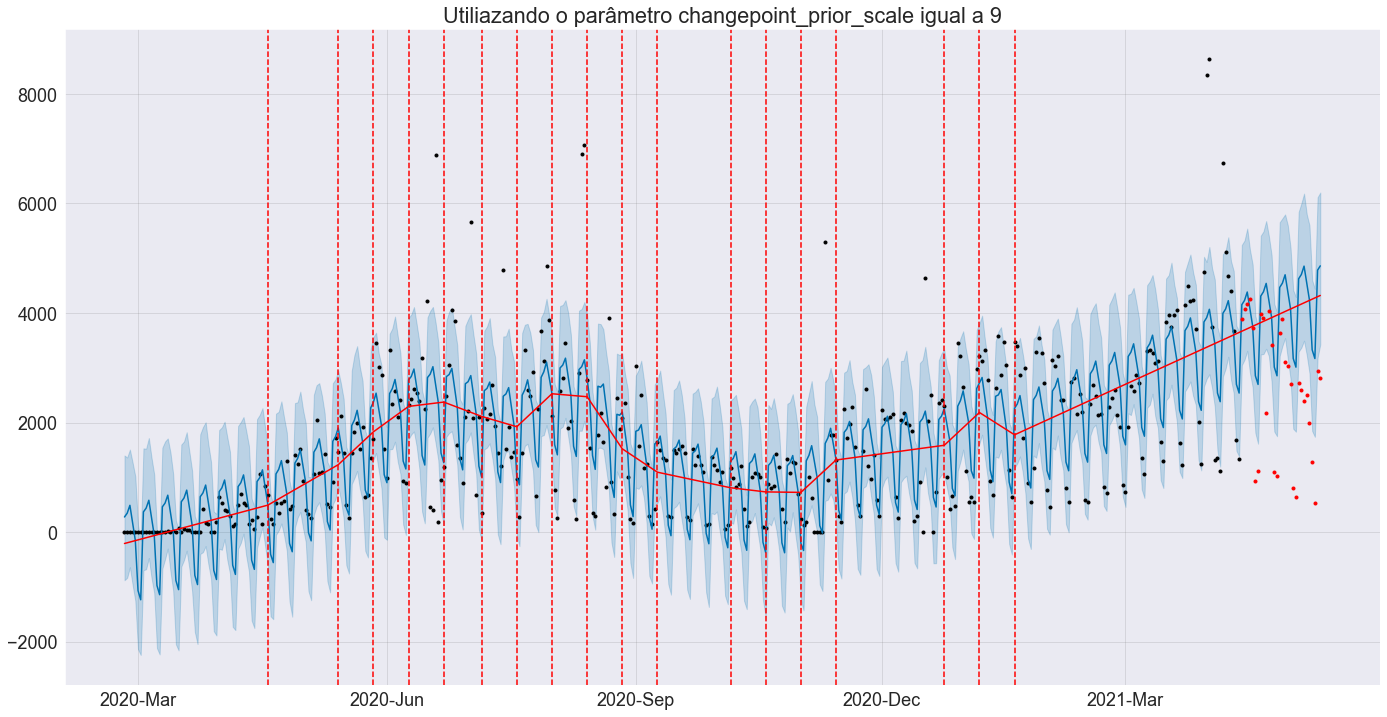

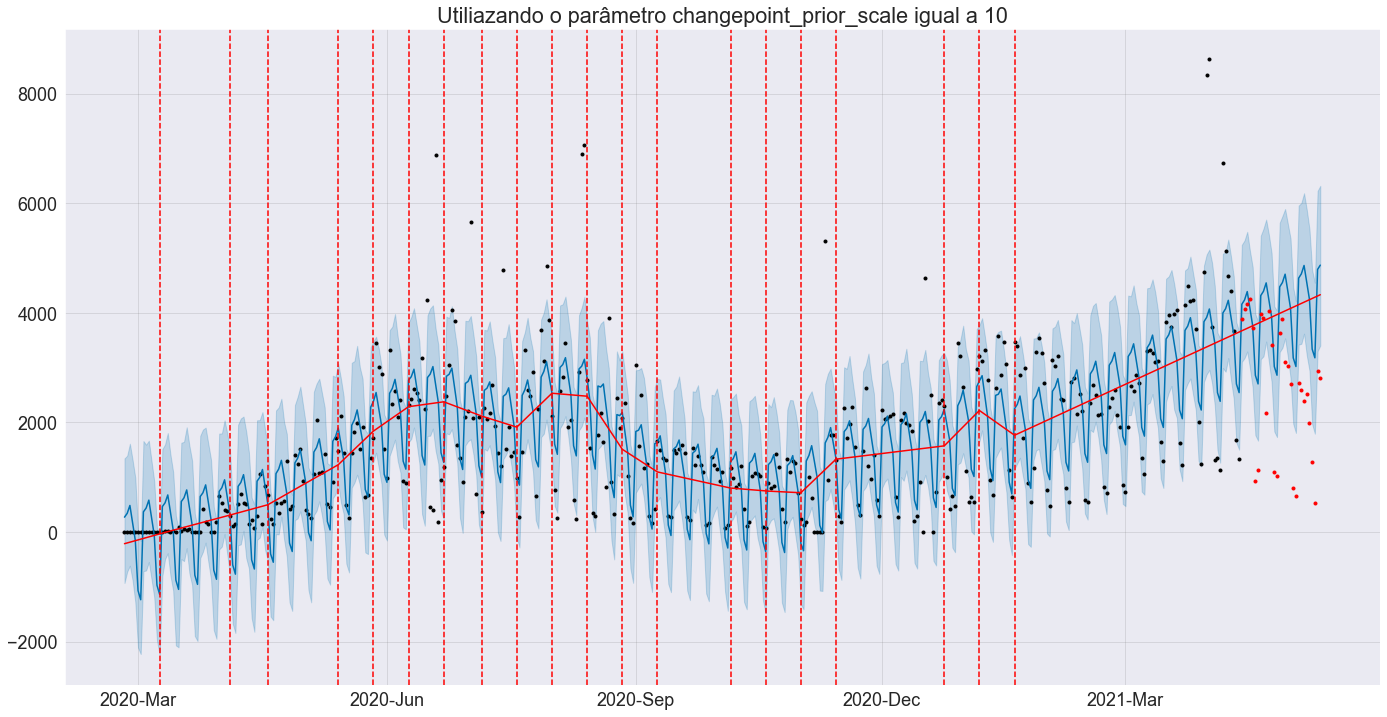

In [104]:
for prior_scale in range(1,11):
    modelo_casos_novos = Modelo_prophet_semanal(df, changepoint_prior_scale=prior_scale)
    fig = modelo_casos_novos.plota(kwargs_testeplot={'color':'red', 'linestyle':'', 'marker':'.'})
    plt.title(f'Utiliazando o parâmetro changepoint_prior_scale igual a {prior_scale}')